Estacion, Kenneth
CPE32S8

# YOLOv3

Loading older python version

In [ ]:
!python --version

Python 3.10.12


In [ ]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.2.12-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


PREFIX=/usr/local
installing: python-3.5.2-0 ...
installing: conda-env-2.6.0-0 ...
installing: openssl-1.0.2j-0 ...
installing: pycosat-0.6.1-py35_1 ...
installing: readline-6.2-2 ...
installing: requests-2.11.1-py35_0 ...
installing: ruamel_yaml-0.11.14-py35_0 ...
installing: sqlite-3.13.0-0 ...
installing: tk-8.5.18-0 ...
installing: xz-5.2.2-0 ...
installing: yaml-0.1.6-0 ...
installing: zlib-1.2.8-3 ...
installing: conda-4.2.12-py35_0 ...
installing: pycrypto-2.6.1-py35_4 ...
installing: pip-8.1.2-py35_0 ...
installing: wheel-0.29.0-py35_0 ...
installing: setuptools-27.2.0-py35_0 ...
creating default environment...
using -f (force) option
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/lo

--2024-04-01 07:06:51--  https://repo.continuum.io/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.177.84, 104.18.176.84, 2606:4700::6812:b154, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.177.84|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh [following]
--2024-04-01 07:06:51--  https://repo.anaconda.com/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33905474 (32M) [application/x-sh]
Saving to: ‘Miniconda3-4.2.12-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0%  106M 0s
    50K .......... .......... .......... .......... ..........

In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.5/site-packages"))

In [ ]:
!python --version

Python 3.5.2 :: Continuum Analytics, Inc.


In [ ]:
!curl -fsSL https://bootstrap.pypa.io/pip/3.5/get-pip.py | python3.5


     |████████████████████████████████| 1.5 MB 4.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 8.1.2
    Uninstalling pip-8.1.2:
      Successfully uninstalled pip-8.1.2


In [ ]:
!pip install tensorflow==1.5.0

NOTE: For the most up to date version of this notebook, please be sure to copy from this link:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ByRi9d6_Yzu0nrEKArmLMLuMaZjYfygO#scrollTo=WgHANbxqWJPa)



## **Training YOLOv3 object detection on a custom dataset**

💡 Recommendation: [Open this blog post](https://blog.roboflow.ai/training-a-yolov3-object-detection-model-with-a-custom-dataset/) to continue.

### **Overview**

This notebook walks through how to train a YOLOv3 object detection model on your own dataset using Roboflow and Colab.

In this specific example, we'll training an object detection model to recognize chess pieces in images. **To adapt this example to your own dataset, you only need to change one line of code in this notebook.**

![Chess Example](https://i.imgur.com/nkjobw1.png)

### **Our Data**

Our dataset of 289 chess images (and 2894 annotations!) is hosted publicly on Roboflow [here](https://public.roboflow.ai/object-detection/chess-full).

### **Our Model**

We'll be training a YOLOv3 (You Only Look Once) model. This specific model is a one-shot learner, meaning each image only passes through the network once to make a prediction, which allows the architecture to be very performant, viewing up to 60 frames per second in predicting against video feeds.

The GitHub repo containing the majority of the code we'll use is available [here](https://github.com/roboflow-ai/keras-yolo3.git).

### **Training**

Google Colab provides free GPU resources. Click "Runtime" → "Change runtime type" → Hardware Accelerator dropdown to "GPU."

Colab does have memory limitations, and notebooks must be open in your browser to run. Sessions automatically clear themselves after 24 hours.

### **Inference**

We'll leverage the `python_video.py` script to produce predictions. Arguments are specified below.

It's recommended that you expand the left-hand panel to view this notebook's Table of contents, Code Snippets, and Files.

![Expand Colab](https://i.imgur.com/r8kWzIv.png "Click here")

Then, click "Files." You'll see files appear here as we work through the notebook.


### **About**

[Roboflow](https://roboflow.ai) makes managing, preprocessing, augmenting, and versioning datasets for computer vision seamless.

Developers reduce 50% of their boilerplate code when using Roboflow's workflow, save training time, and increase model reproducibility.

#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)







## Setup our environment

First, we'll install the version of Keras our YOLOv3 implementation calls for and verify it installs corrects.

In [ ]:
# Get our kernel running
print("Hello, Roboflow")

Hello, Roboflow


In [ ]:
# Our YOLOv3 implementation calls for this Keras version
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 3.7 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 269 kB 40.9 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 26.0 MB 1.3 MB/s 
     |████████████████████████████████| 2.8 MB 54.0 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp35-cp35m-linux_x86_64.whl size=505954 sha256=45a824a178a0b1f7e8718350848eeed9b484fe25ed2a874fcfb93a775038780a
  Stored in directory: /root/.cache/pip/wheels/57/d0/2c/e2003abb5bc1a94c2e8a6fe1c03b8055d074e34c13672e7eb7
Successfully built pyyaml


In [ ]:
# use TF 1.x
# %tensorflow_version 1.x
!pip show tensorflow

In [ ]:
# Verify our version is correct
!pip show keras

Name: Keras
Version: 2.2.4
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.5/site-packages
Requires: pyyaml, six, keras-applications, numpy, keras-preprocessing, h5py, scipy
Required-by: 


In [ ]:
# Next, we'll grab all the code from our repository of interest
!git clone https://github.com/roboflow-ai/keras-yolo3

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 169, done.
remote: Total 169 (delta 0), reused 0 (delta 0), pack-reused 169
Receiving objects: 100% (169/169), 172.74 KiB | 4.02 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
# here's what we cloned (also, see "Files" in the left-hand Colab pane)
%ls

keras-yolo3/  Miniconda3-4.2.12-Linux-x86_64.sh*  sample_data/


In [ ]:
# change directory to the repo we cloned
%cd keras-yolo3/

/content/keras-yolo3


In [ ]:
# show the contents of our repo
%ls

coco_annotation.py  font/      model_data/          train.py           yolo3/      yolov3-tiny.cfg
convert.py          kmeans.py  README.md            Tutorial.ipynb     yolo.py     yolo_video.py
darknet53.cfg       LICENSE    train_bottleneck.py  voc_annotation.py  yolov3.cfg


## Get our training data from Roboflow

Next, we need to add our data from Roboflow into our environment.

Our dataset, with annotations, is [here](https://public.roboflow.ai/object-detection/chess-full).

Here's how to bring those images from Roboflow to Colab:

1. Visit this [link](https://public.roboflow.ai/object-detection/chess-full).
2. Click the "416x416auto-orient" under Downloads.
3. On the dataset detail page, select "Download" in the upper right-hand corner.
4. If you are not signed in, you will be prompted to create a free account (sign in with GitHub or email), and redirected to the dataset page to Download.
5. On the download popup, select the YOLOv3 Keras option **and** the "Show download `code`".
6. Copy the code snippet Roboflow generates for you, and paste it in the next cell.

This is the download menu you want (from step 5):
#### ![Download Menu](https://i.imgur.com/KW2PyQO.png)

The top code snippet is the one you want to copy (from step 6) and paste in the next notebook cell:
### ![Code Snippet](https://i.imgur.com/qzJckWR.png)





**This cell below is only one you need to change to have YOLOv3 train on your own Roboflow dataset.**

In [ ]:
# Paste Roboflow code from snippet here from above to here! eg !curl -L https://app.roboflow.ai/ds/eOSXbt7KWu?key=YOURKEY | jar -x
!curl -L "https://public.roboflow.com/ds/tbrFGZUVaW?key=8ndtpz59IU" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   907  100   907    0     0   3203      0 --:--:-- --:--:-- --:--:--  3216
100 16.2M  100 16.2M    0     0  16.5M      0 --:--:-- --:--:-- --:--:-- 83.9M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
 extracting: test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
 extracting: test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
 extracting: test/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg  
 extracting: test/4e3117459d759798537eb52cf5bf534d_jpg.rf.ec961b62d4b0e131fae760ed1f80836b.jpg  
 extracting: test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.9dbdb057f6533c0c09c0eda

In [ ]:
%ls

coco_annotation.py  LICENSE              test/                valid/             yolov3-tiny.cfg
convert.py          model_data/          train/               voc_annotation.py  yolo_video.py
darknet53.cfg       README.dataset.txt   train_bottleneck.py  yolo3/
font/               README.md            train.py             yolo.py
kmeans.py           README.roboflow.txt  Tutorial.ipynb       yolov3.cfg


In [ ]:
# change directory into our export folder from Roboflow
%cd train

/content/keras-yolo3/train


In [ ]:
# show what came with the Roboflow export
%ls

00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.1a1407058a6170f001f2c269411d31d3.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.20e061b75dc554ebe40b33189e320831.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.38c0bb7971151bf4cb185f5498fddcc0.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.22f030d1bd7a26c987f287d2de4b19c7.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.254cb905329fee7e2df63d14b15368db.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.9d4f5de6e48861cf9108e46aee8dbb8f.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.087fbe5ea178dd757f4eb065ae5cf941.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.51d15aa9df1efc29ceca818ecbce37e1.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.d1c527f45625192911705f97416af54b.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.56da1174519560712119d3fc195068cb.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.7871491670bed0423e3beceb3fae8016.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.91a1164b0c74bbe8ab32435e44b990a4.jpg
03886821377011fec599e8fa12d86e89_jpg.rf.44fb00bcea92435e28c1ea1a89595b32.jpg

In [ ]:
# move everything from the Roboflow export to the root of our keras-yolo3 folder
%mv * ../

In [ ]:
# change directory back to our
%cd ..

/content/keras-yolo3


In [ ]:
# show that all our images, _annotations.txt, and _classes.txt made it to our root directory
%ls

00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.1a1407058a6170f001f2c269411d31d3.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.20e061b75dc554ebe40b33189e320831.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.38c0bb7971151bf4cb185f5498fddcc0.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.22f030d1bd7a26c987f287d2de4b19c7.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.254cb905329fee7e2df63d14b15368db.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.9d4f5de6e48861cf9108e46aee8dbb8f.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.087fbe5ea178dd757f4eb065ae5cf941.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.51d15aa9df1efc29ceca818ecbce37e1.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.d1c527f45625192911705f97416af54b.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.56da1174519560712119d3fc195068cb.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.7871491670bed0423e3beceb3fae8016.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.91a1164b0c74bbe8ab32435e44b990a4.jpg
03886821377011fec599e8fa12d86e89_jpg.rf.44fb00bcea92435e28c1ea1a89595b32.jpg

## Set up and train our model

Next, we'll download pre-trained weighs weights from DarkNet, set up our YOLOv3 architecture with those pre-trained weights, and initiate training.


In [ ]:
# download our DarkNet weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-04-01 07:09:14--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  29.8MB/s    in 8.4s    

2024-04-01 07:09:23 (28.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# call a Python script to set up our architecture with downloaded pre-trained weights
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

Below, we'll call a "self-contained" Python script that initiates training our model on our custom dataset.

Pay notable attention to:
- setting the paths for our `annotation_path`, `classes_path`, `class_names`. If you move the Roboflow data location, you'll need to update these.
- `val_split` dictates the size of our training data relative to our taining data
- `lr=1e-3` to set the learning rate of the model. Smaller optimizes more slowly but potentially more precisely.
- `batch_size` for the number of images trained per batch
-  `epoch` inside `model.fit_generator()` sets the number training epochs to increase/decrease training examples (and time)

Consider reading the YOLOv3 paper [here](https://pjreddie.com/media/files/papers/YOLOv3.pdf).

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 1.5.0
Summary: TensorFlow helps the tensors flow
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.5/site-packages
Requires: wheel, absl-py, protobuf, tensorflow-tensorboard, six, numpy
Required-by: 


In [ ]:
"""
Self-contained Python script to train YOLOv3 on your own dataset
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '_annotations.txt'  # path to Roboflow data annotations
    log_dir = 'logs/000/'                 # where we're storing our logs
    classes_path = '_classes.txt'         # path to Roboflow class names
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2 # set the size of the validation set
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 16
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=200,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 16 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=0,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

In [ ]:
!pip install pillow
!pip install matplotlib

     |████████████████████████████████| 2.2 MB 4.9 MB/s 
     |████████████████████████████████| 13.0 MB 4.9 MB/s 
     |████████████████████████████████| 229 kB 50.6 MB/s 
     |████████████████████████████████| 90 kB 11.9 MB/s 
     |████████████████████████████████| 67 kB 6.8 MB/s 


In [ ]:
!nvidia-smi

Mon Apr  1 07:10:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install tensorflow-gpu

In [ ]:
## can call this cell instead of the above
!python train.py

# YOLOv8


Install YOLOv8

In [1]:
!pip install ultralytics==8.0.196
import os
HOME = os.getcwd()
print(HOME)
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [2]:

from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 302MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 87.5MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 128.5ms
Speed: 15.1ms preprocess, 128.5ms inference, 867.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


Preparing a custom dataset

In [4]:
%cd {HOME}
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="6MU7P8GYBpgYpRFDQuAW")
project = rf.workspace("cahs-robotics").project("chess2-xz61f")
version = project.version(9)
dataset = version.download("yolov8")

/content
/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess2-9 in yolov8:: 100%|██████████| 2364/2364 [00:00<00:00, 4027.20it/s]


Custom Training

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 352MB/s]
New https://pypi.org/project/ultralytics/8.1.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Chess2-9/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1711971435.1db579d31acd.1952.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2560.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2561.jpg  weights
P_curve.png					    train_batch2562.jpg
PR_curve.png					    train_batch2.jpg


/content


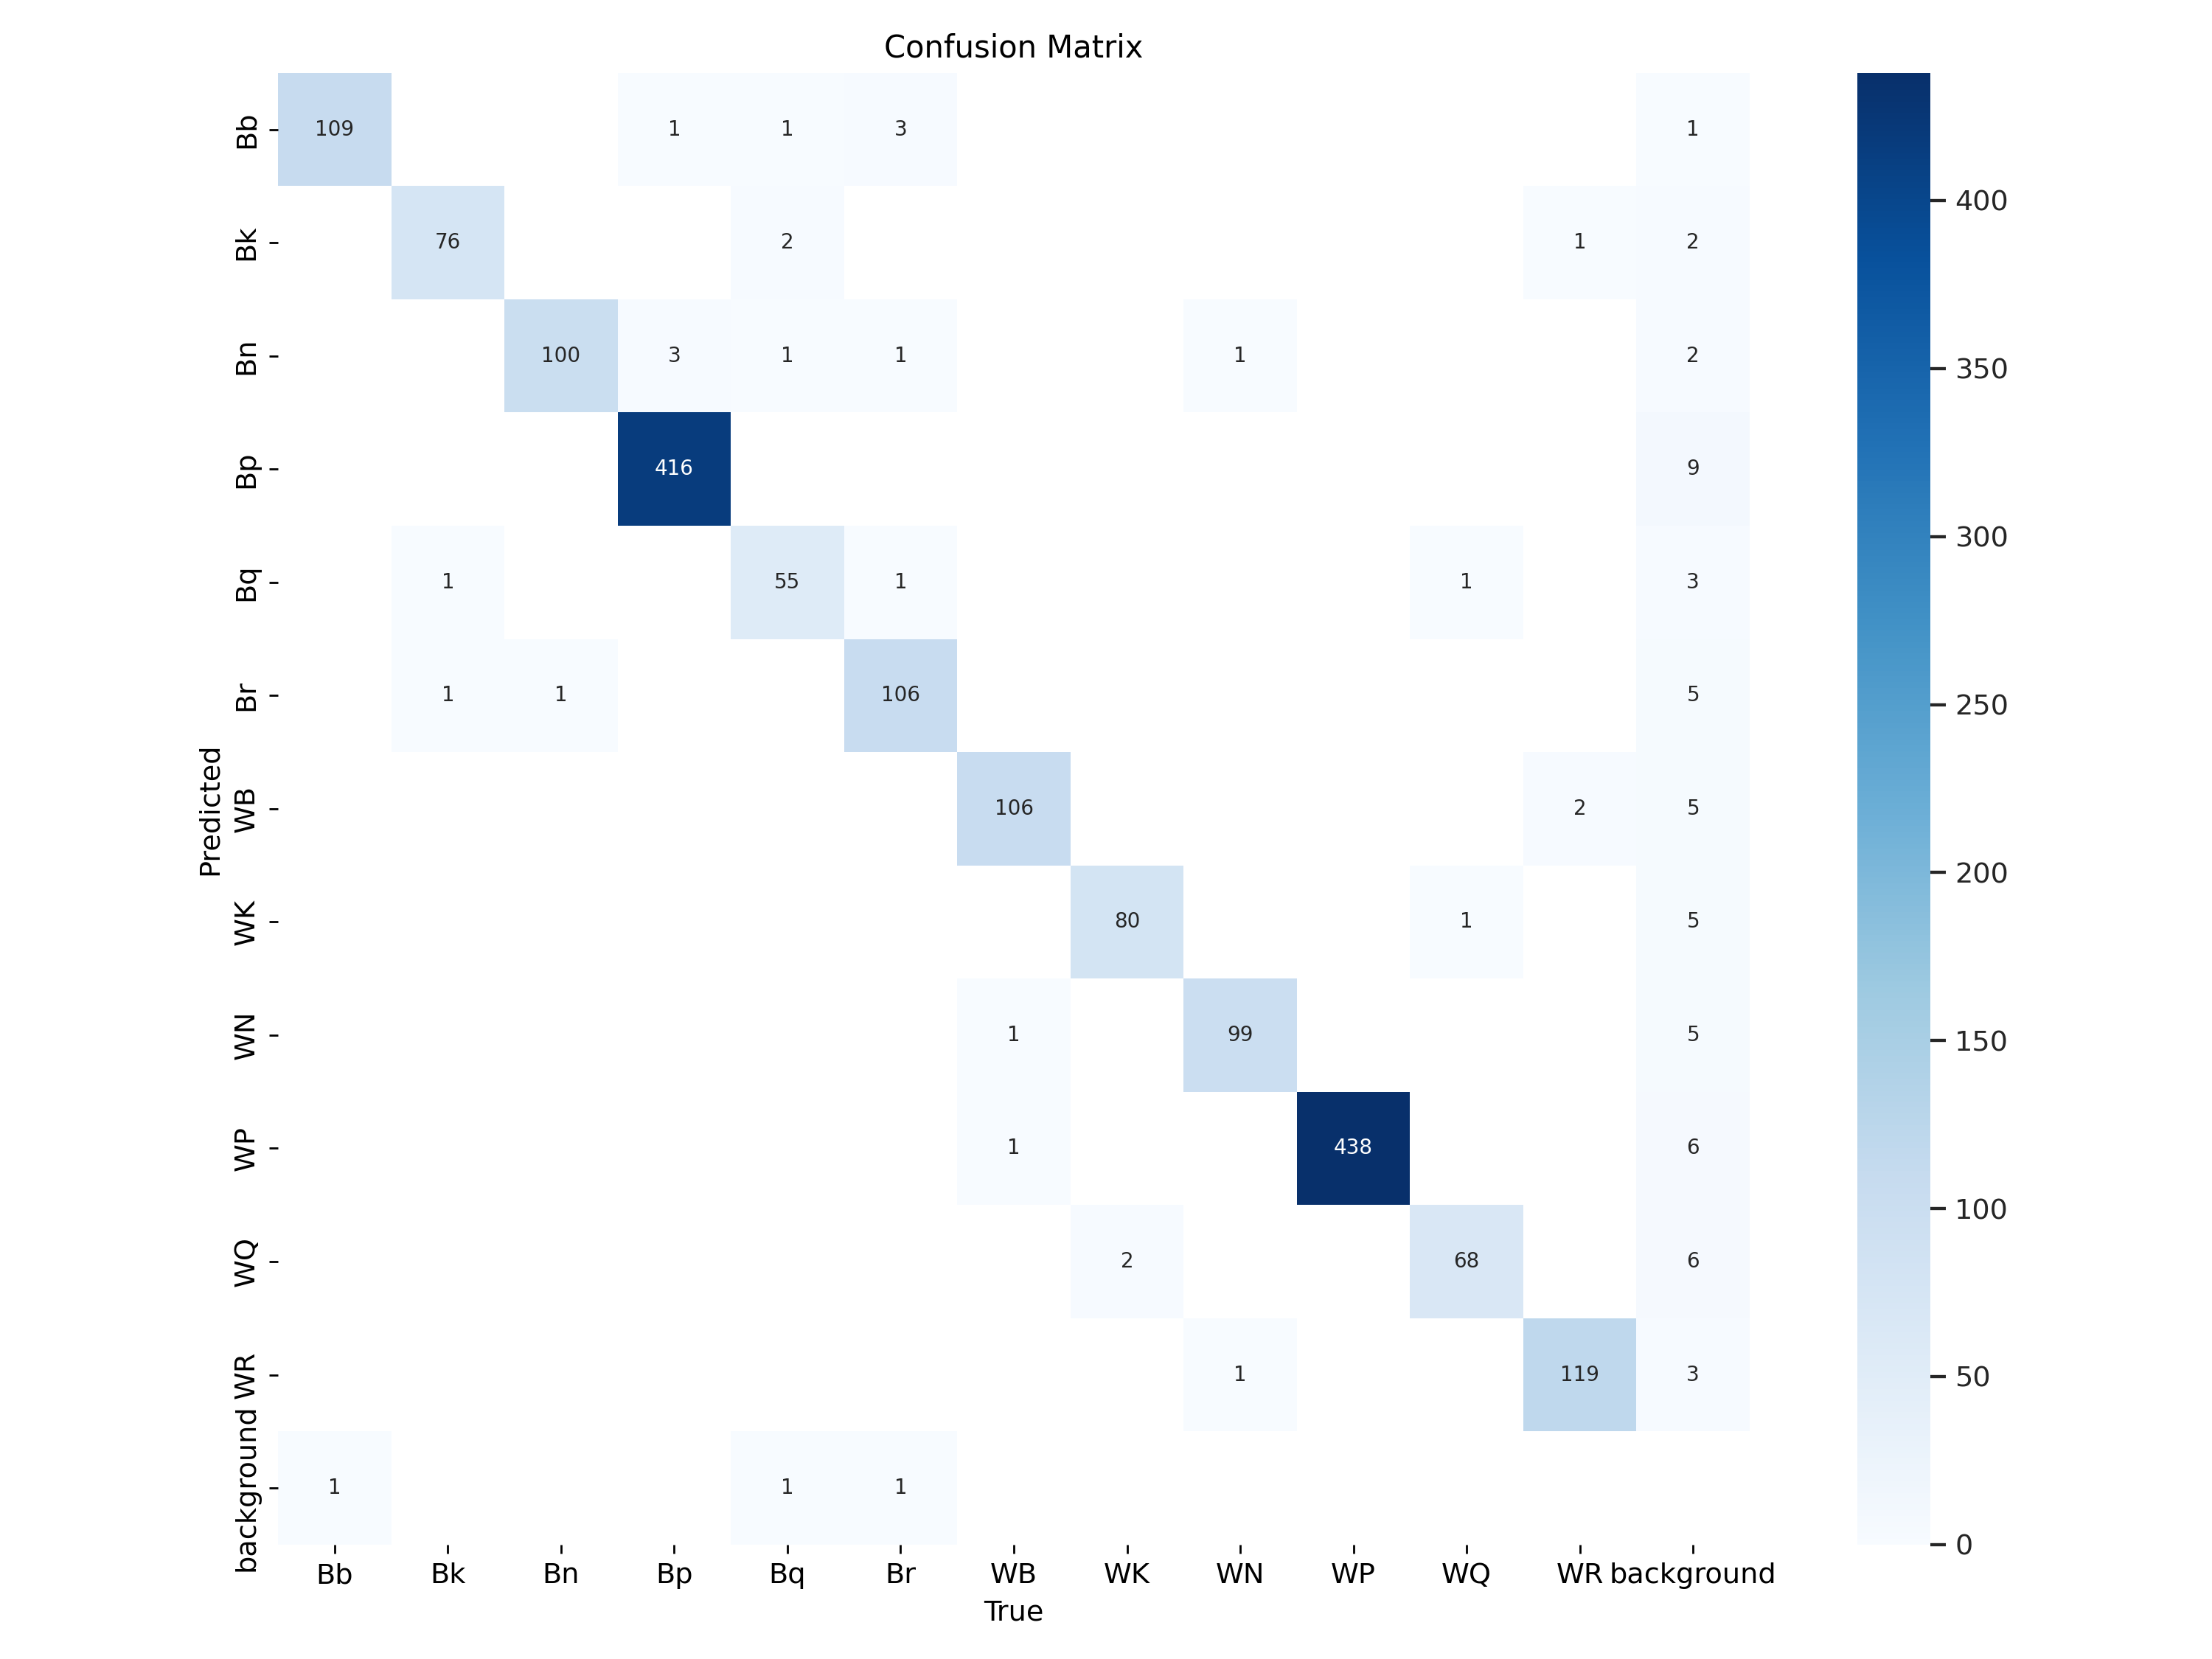

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

Shown above is the confusion matrix of the model. It has a great accuracy in recognizing the pieces from each other. However, it is confused on the background. More training may solve this issue.

/content


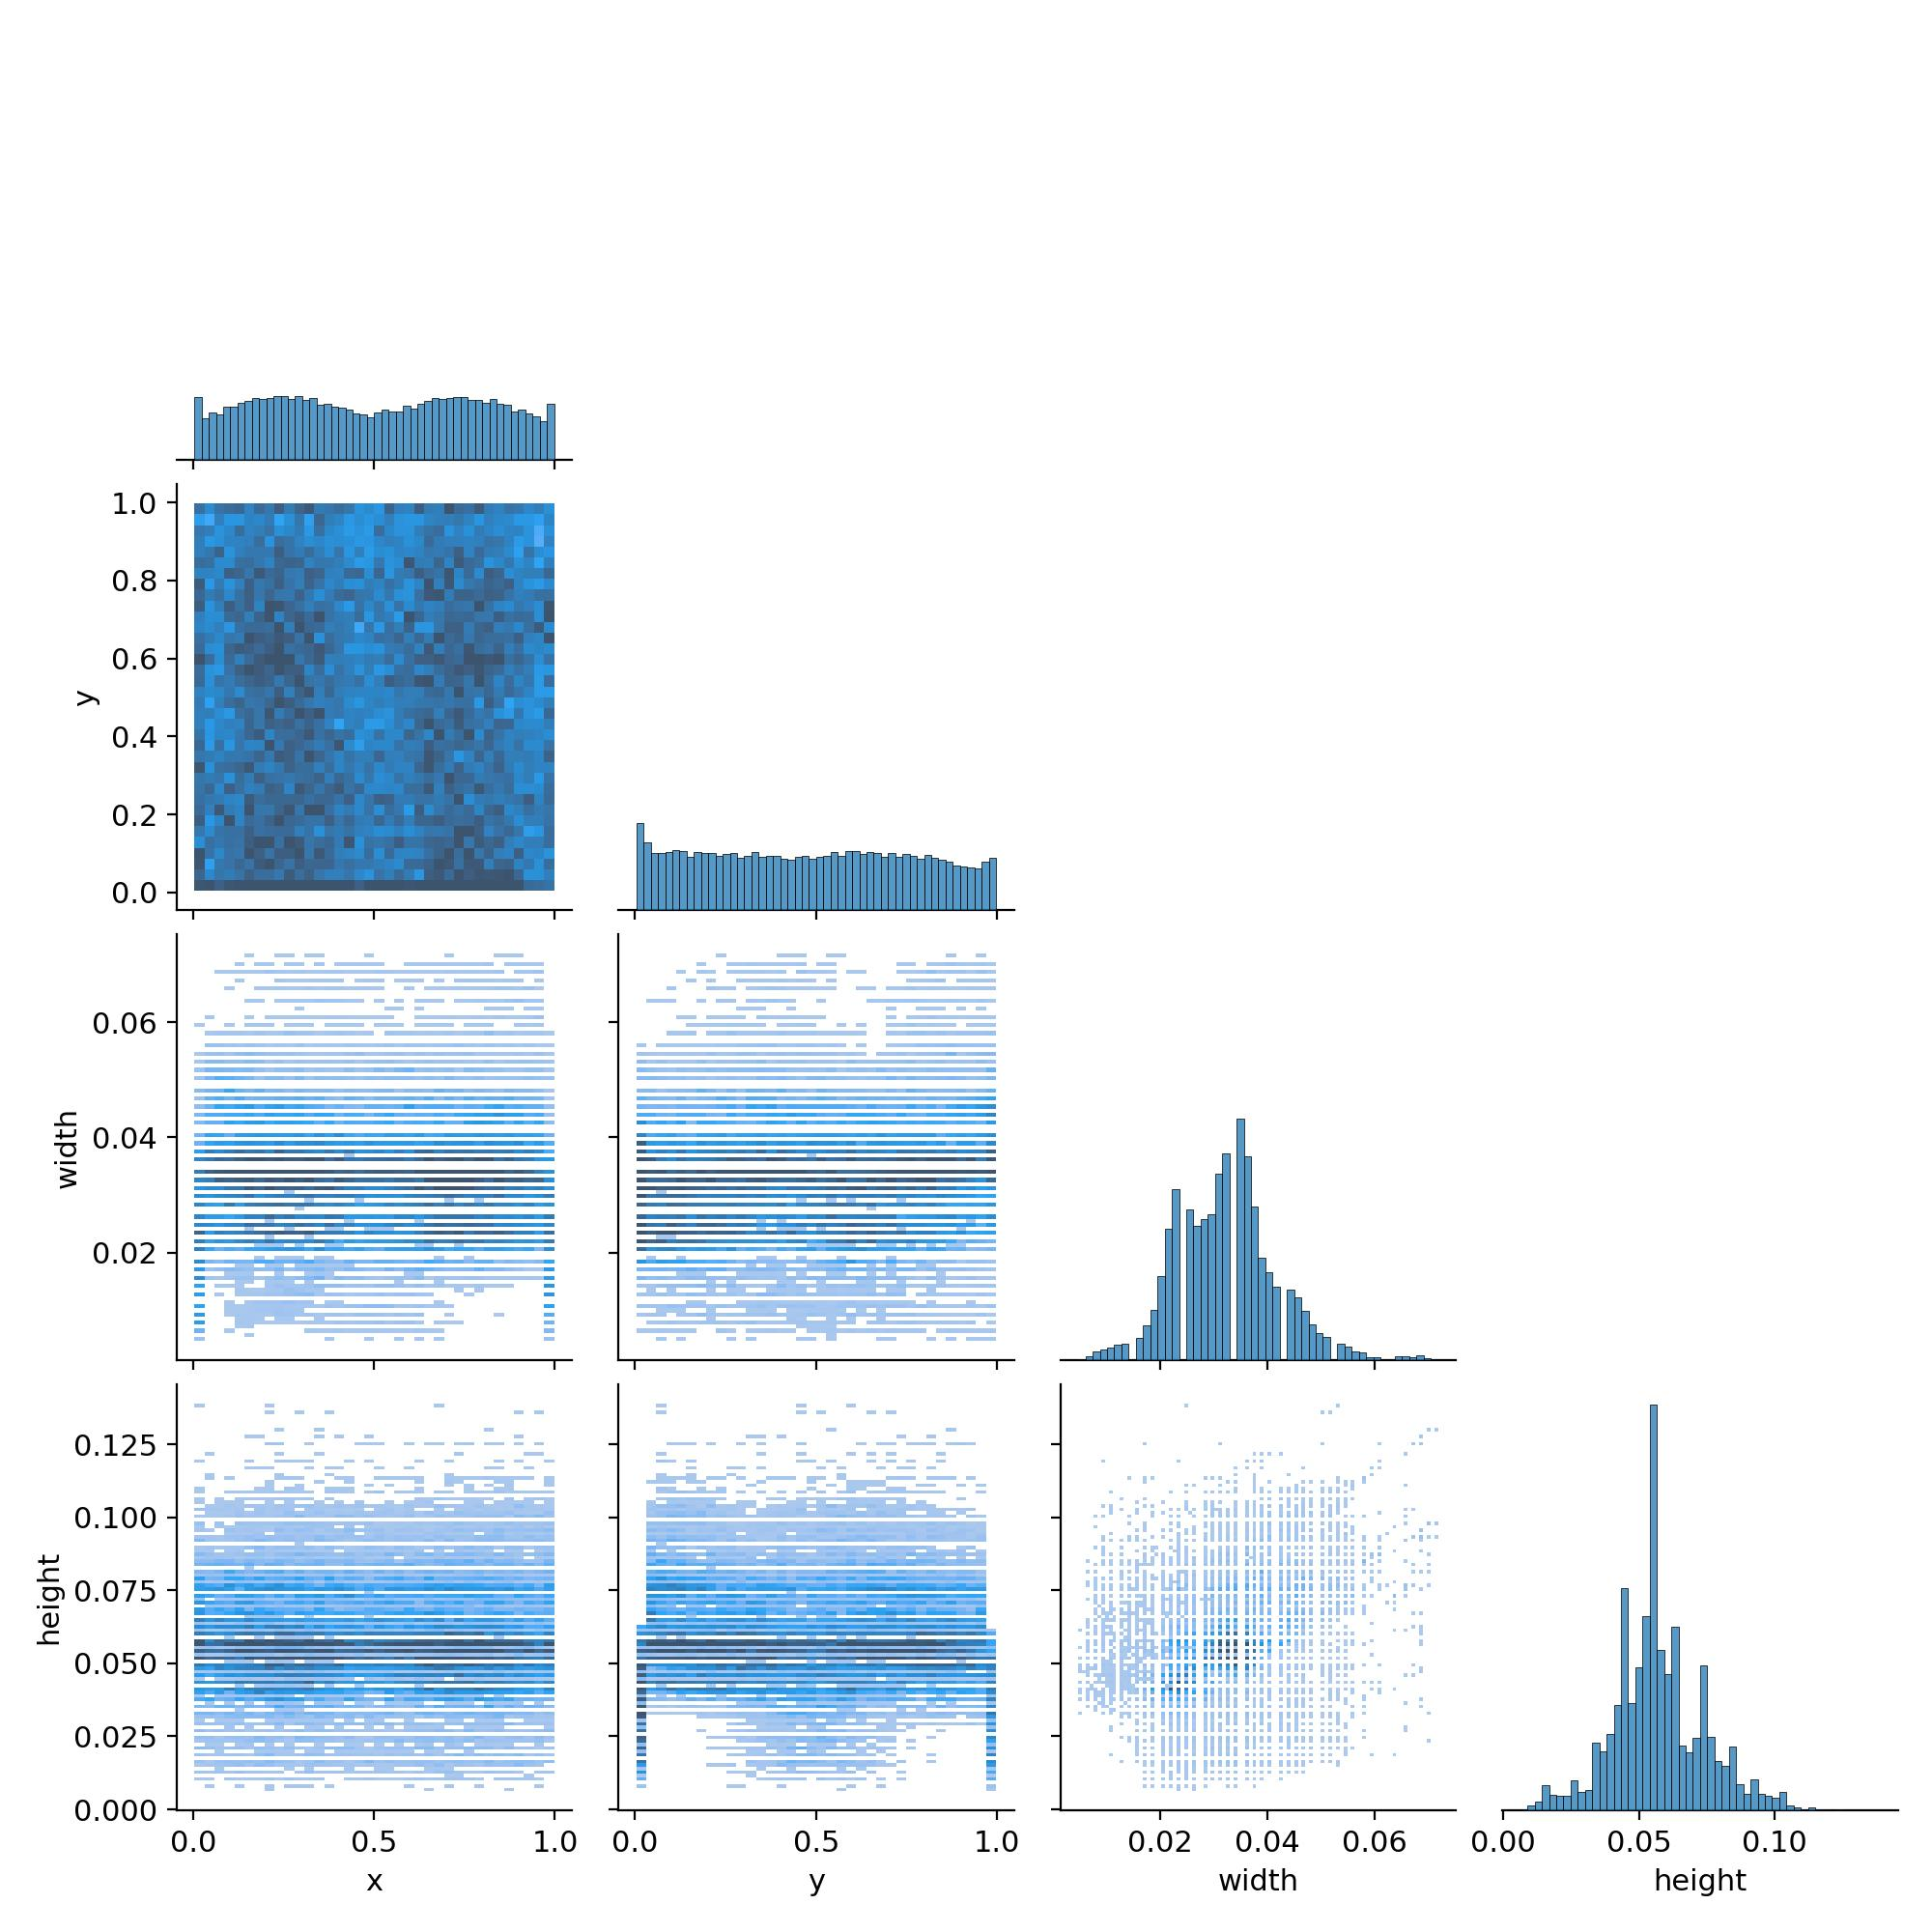

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=600)

/content


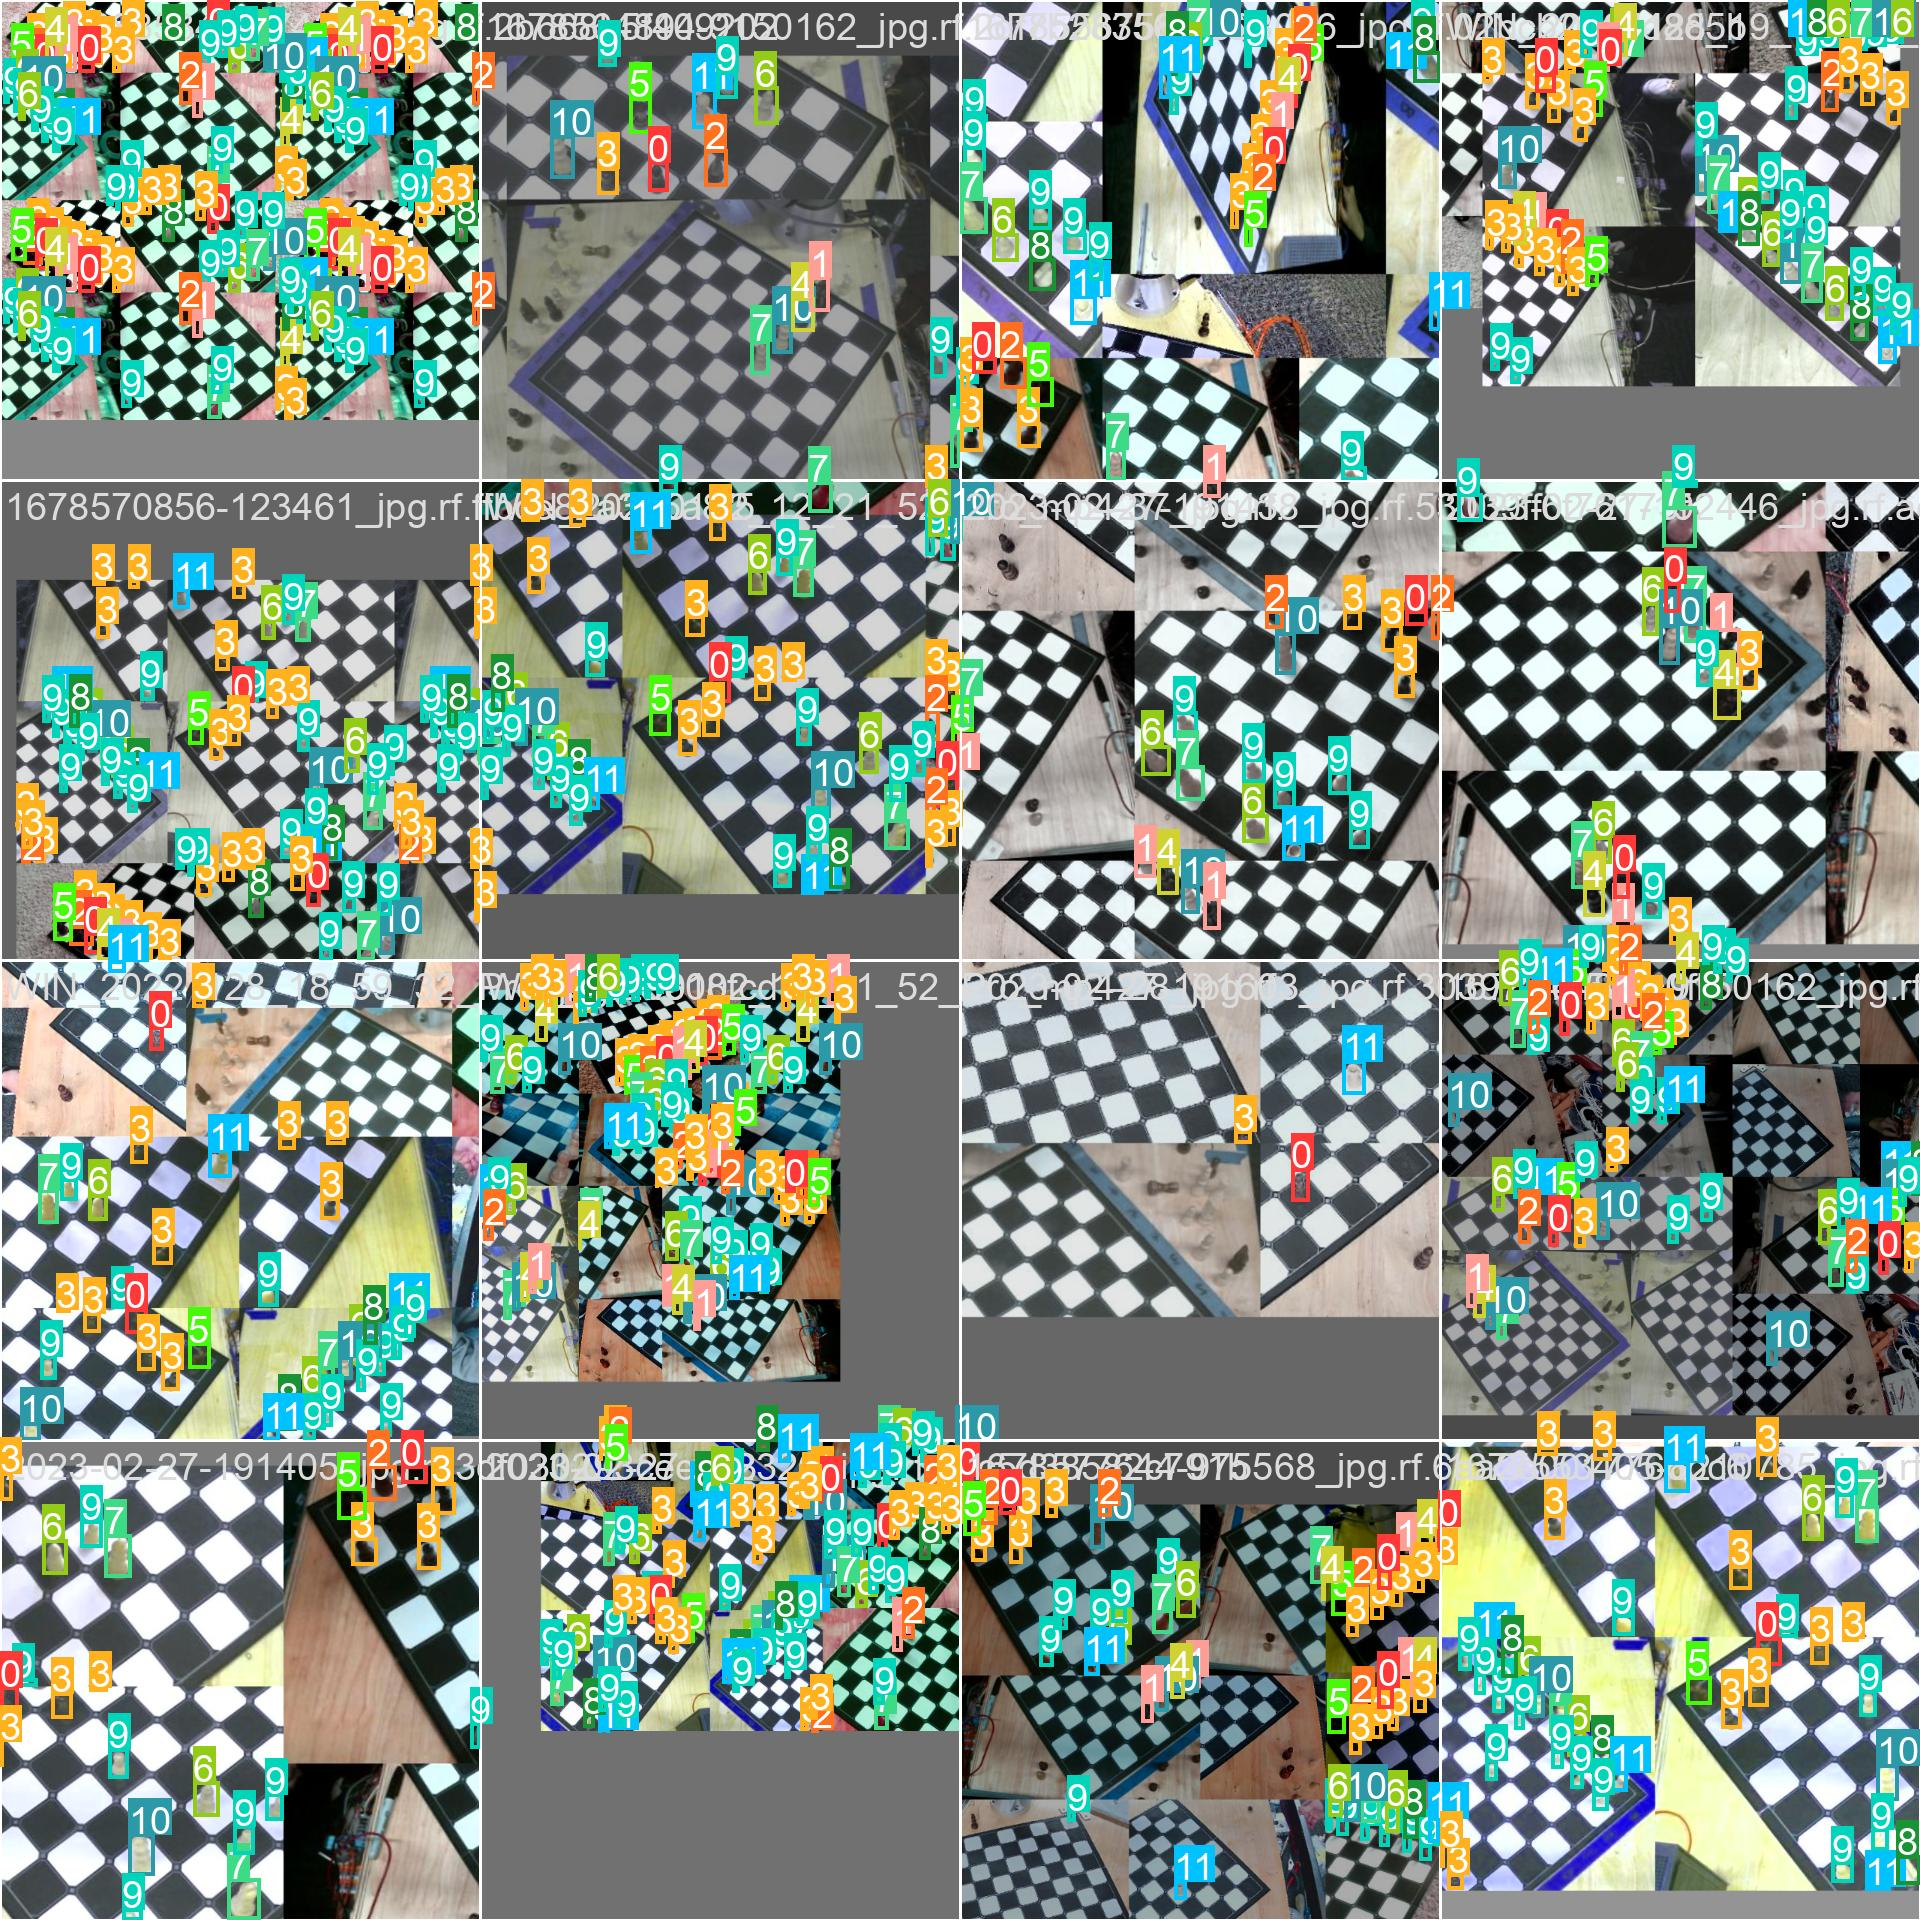

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=1000)

In this given sample of images, it is clear that the model can see various chess pieces accurately. The model also recognize each pieces on the board at high precision indicating that the model performs well.

/content


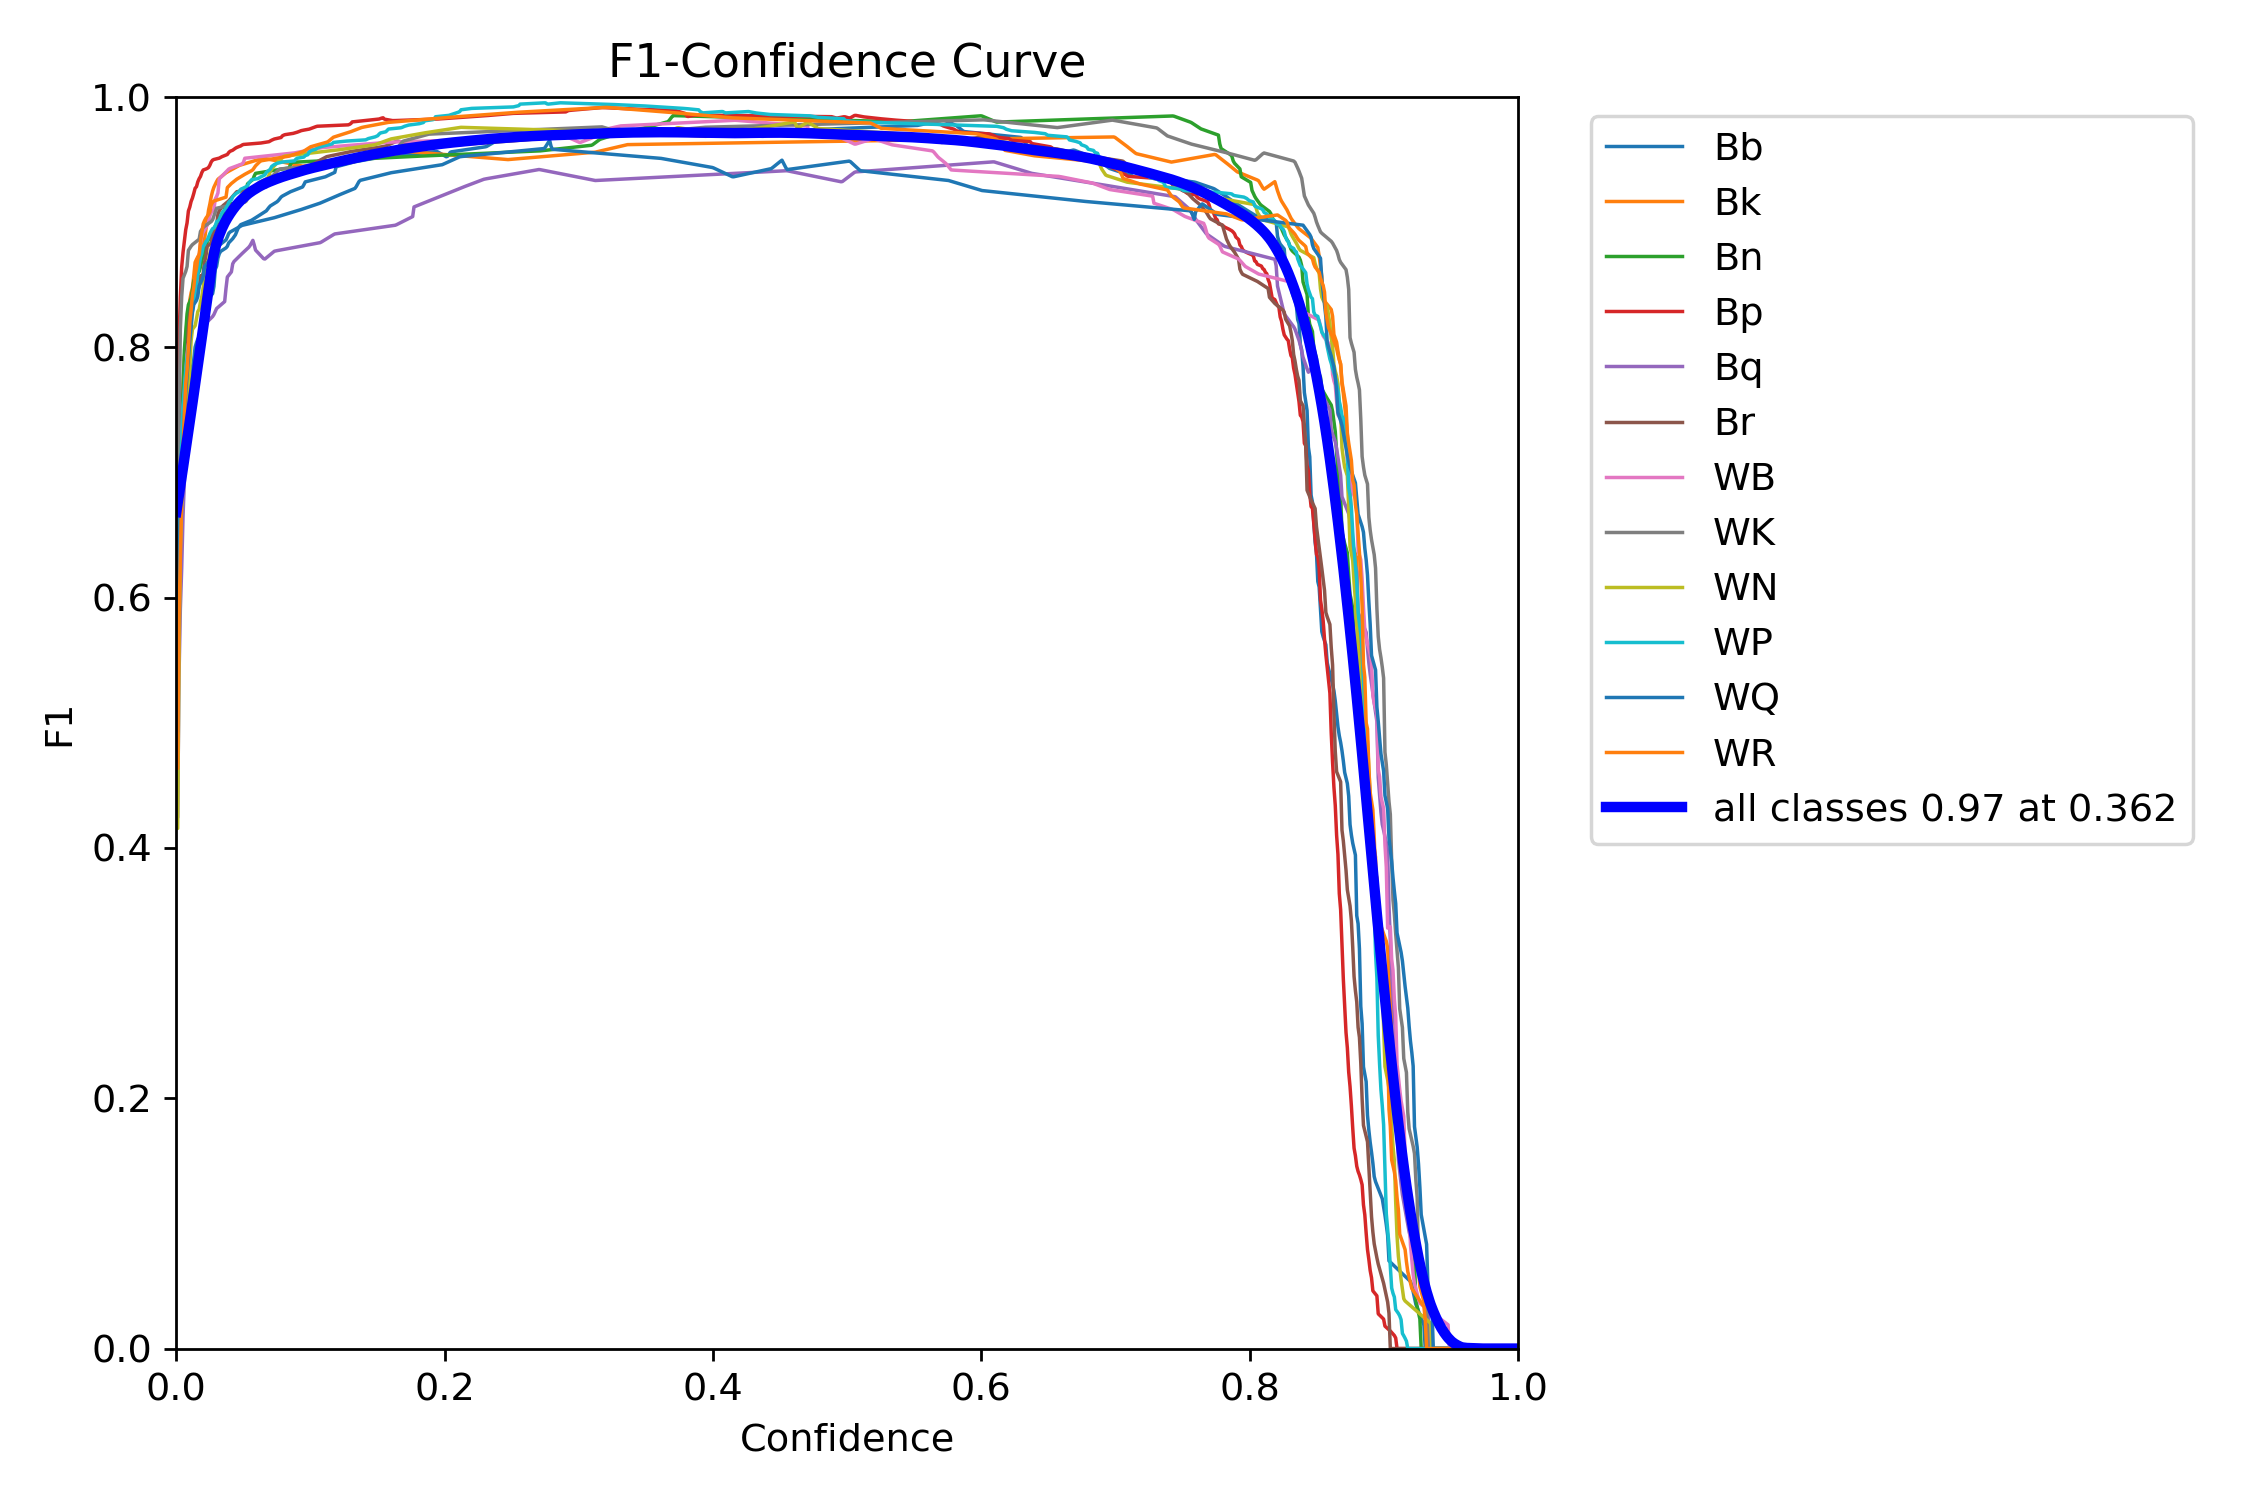

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


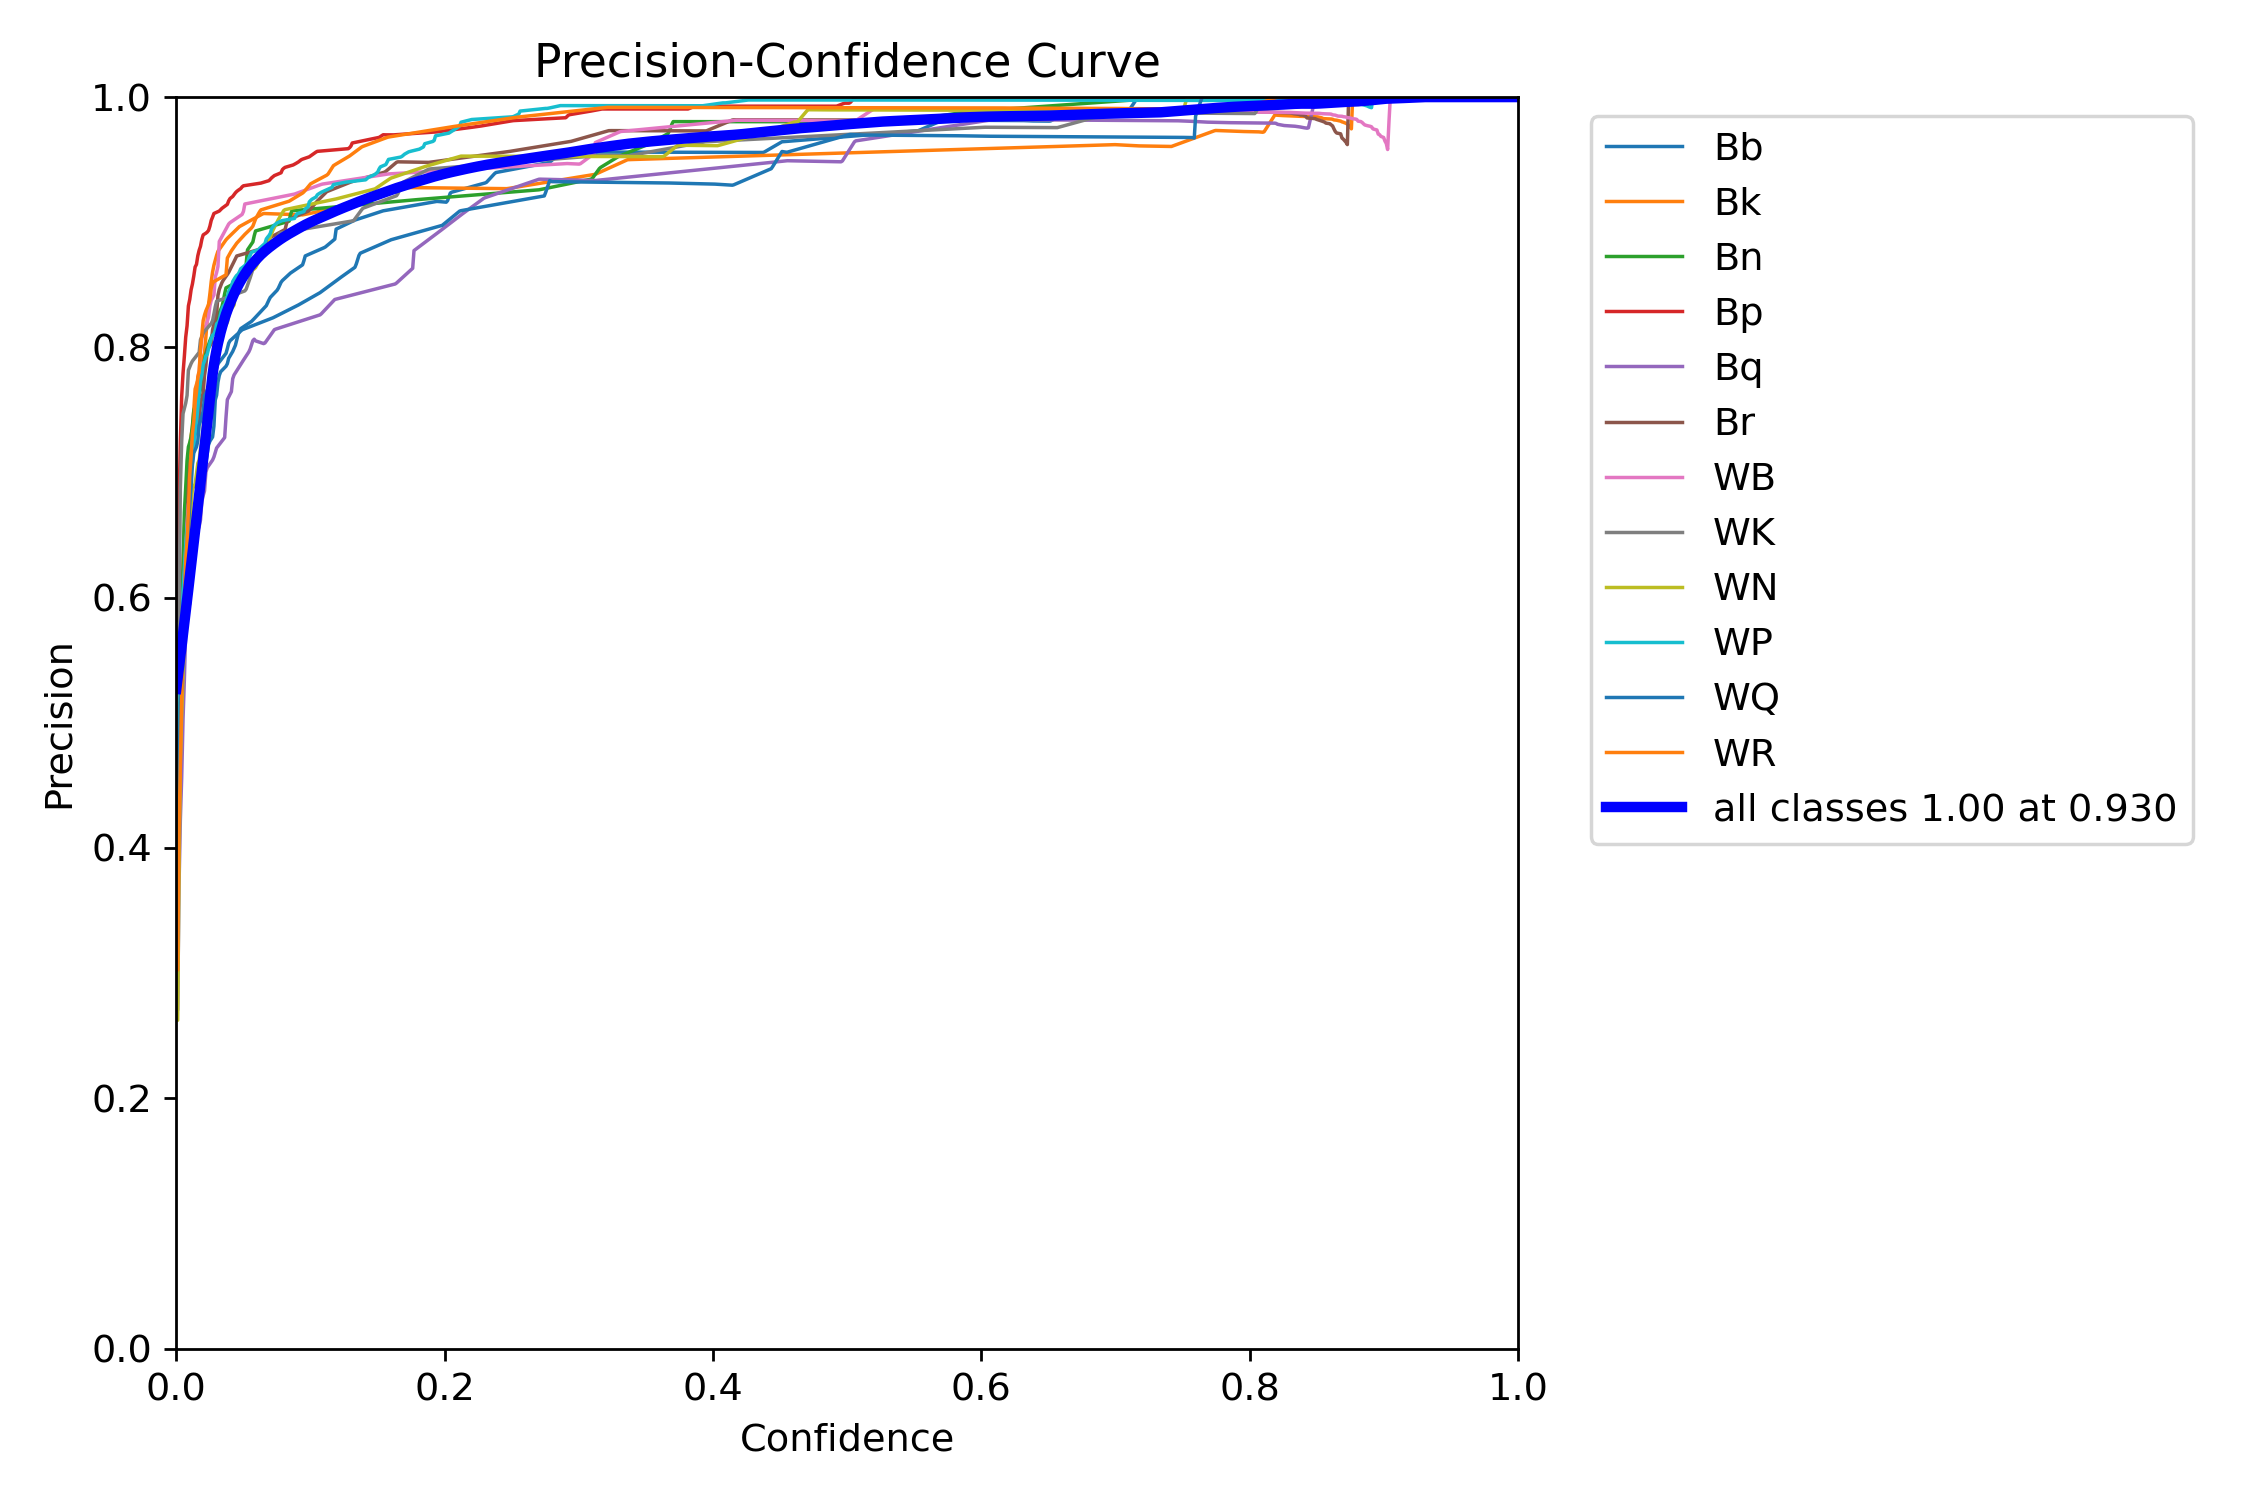

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

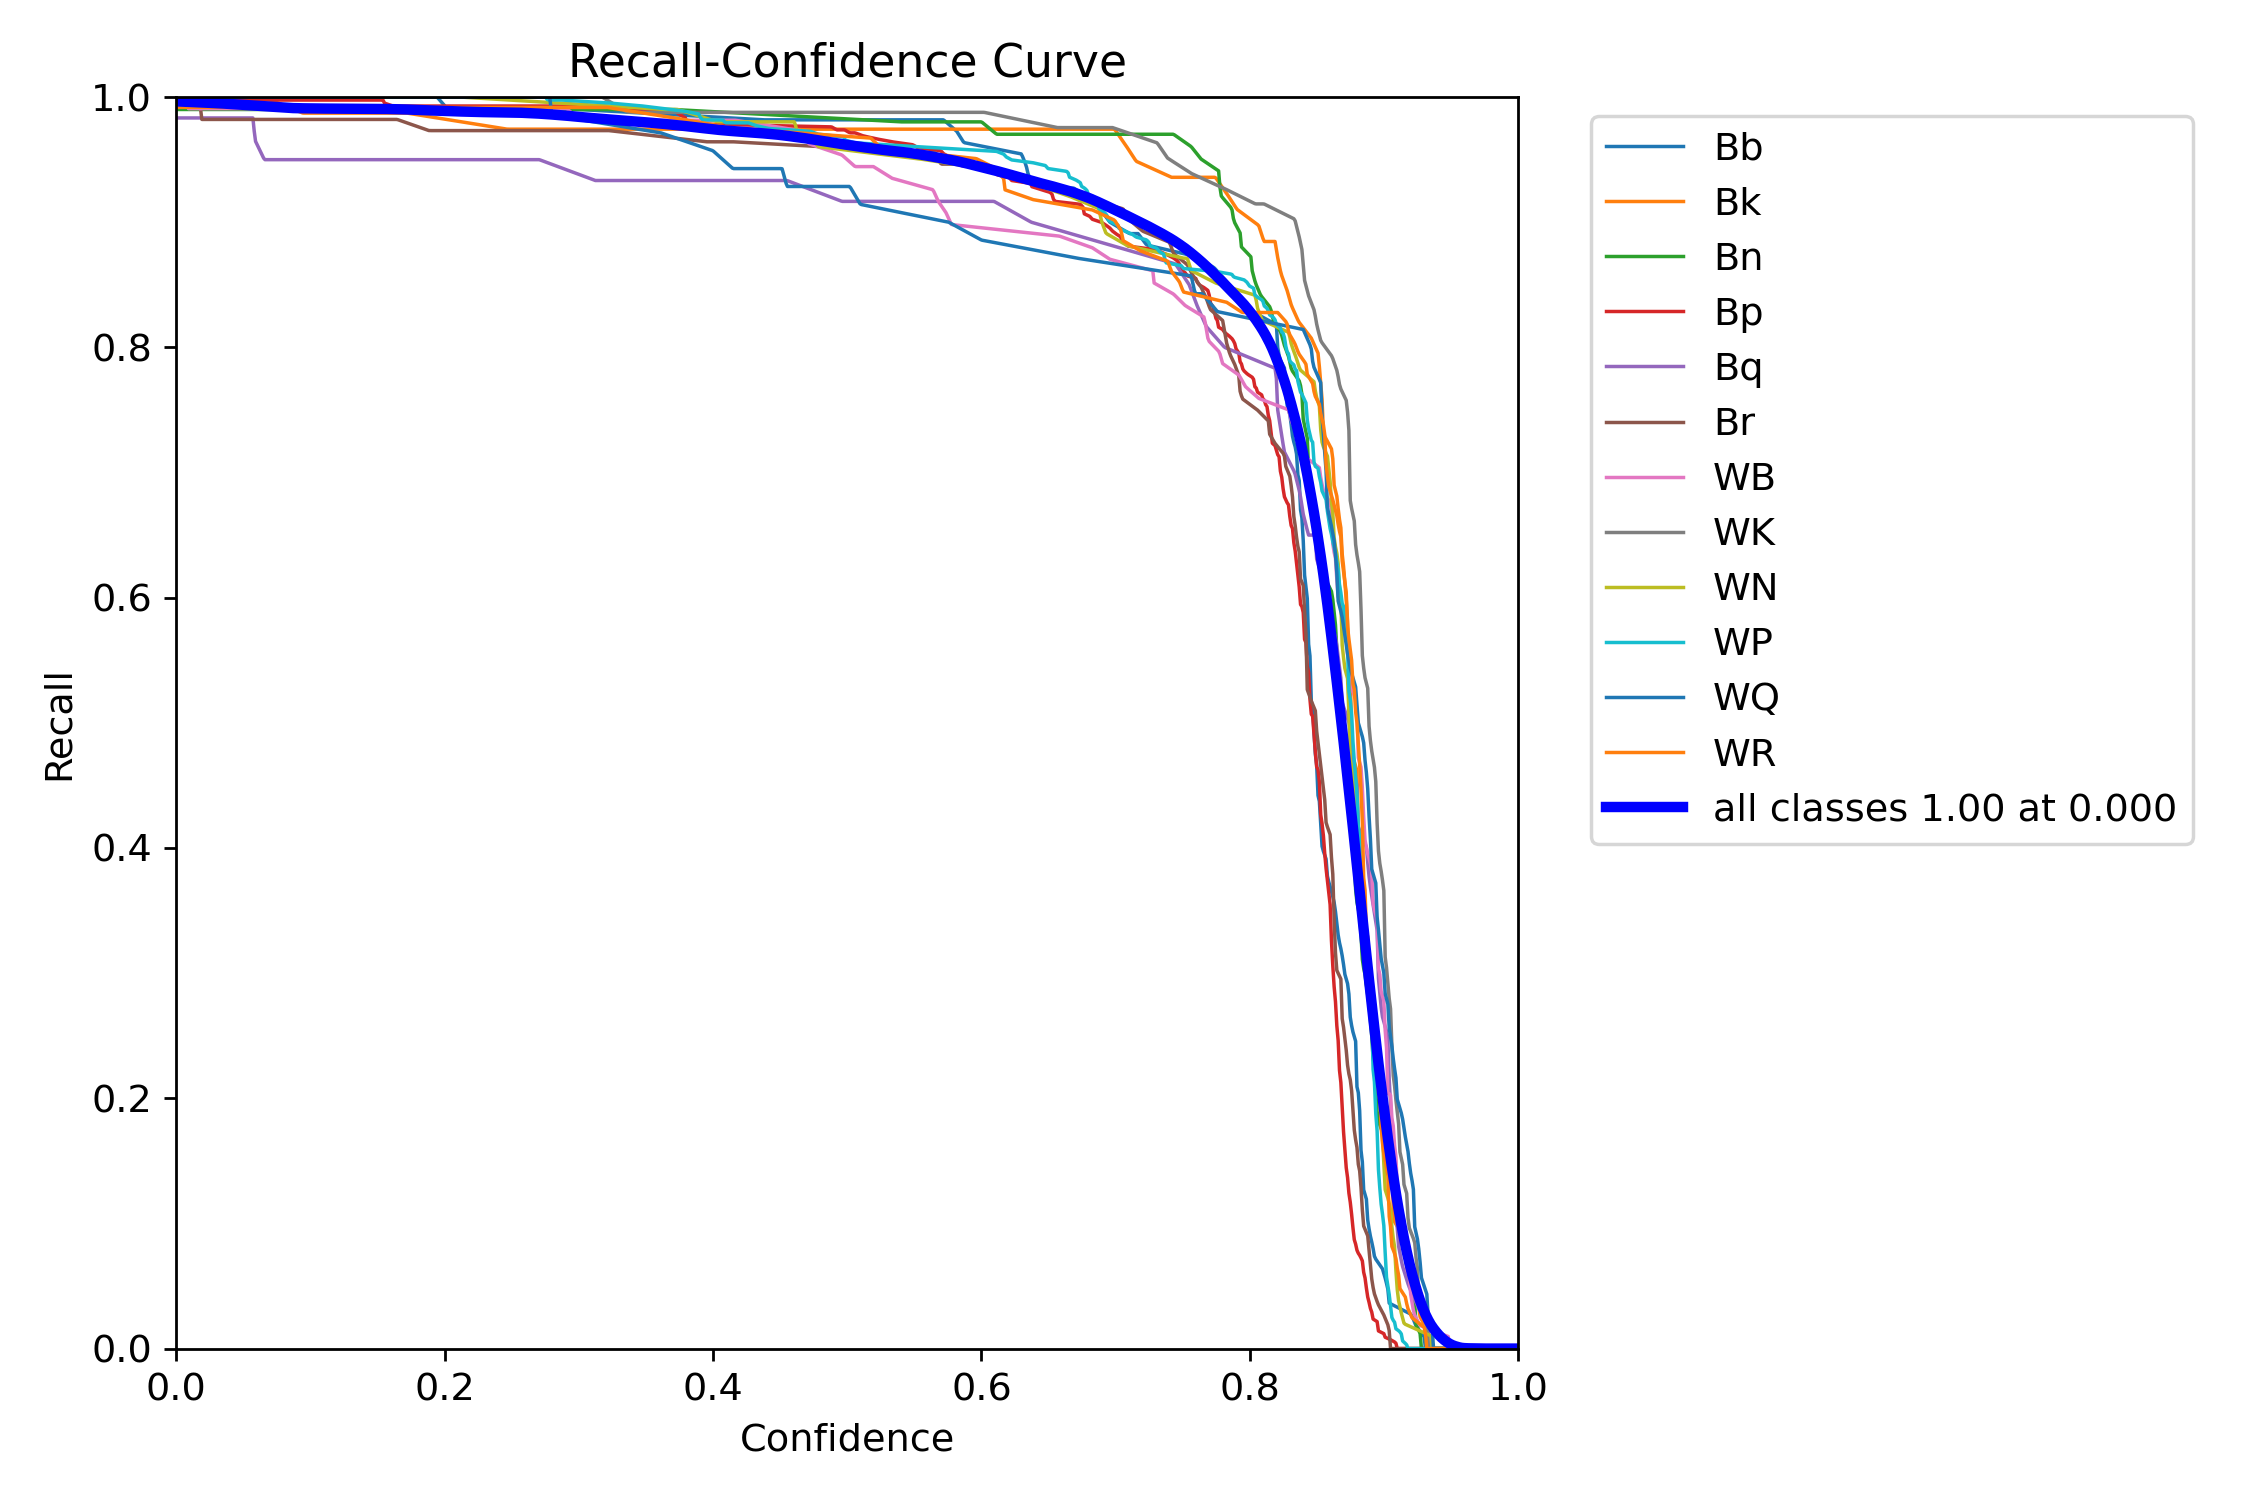

In [13]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

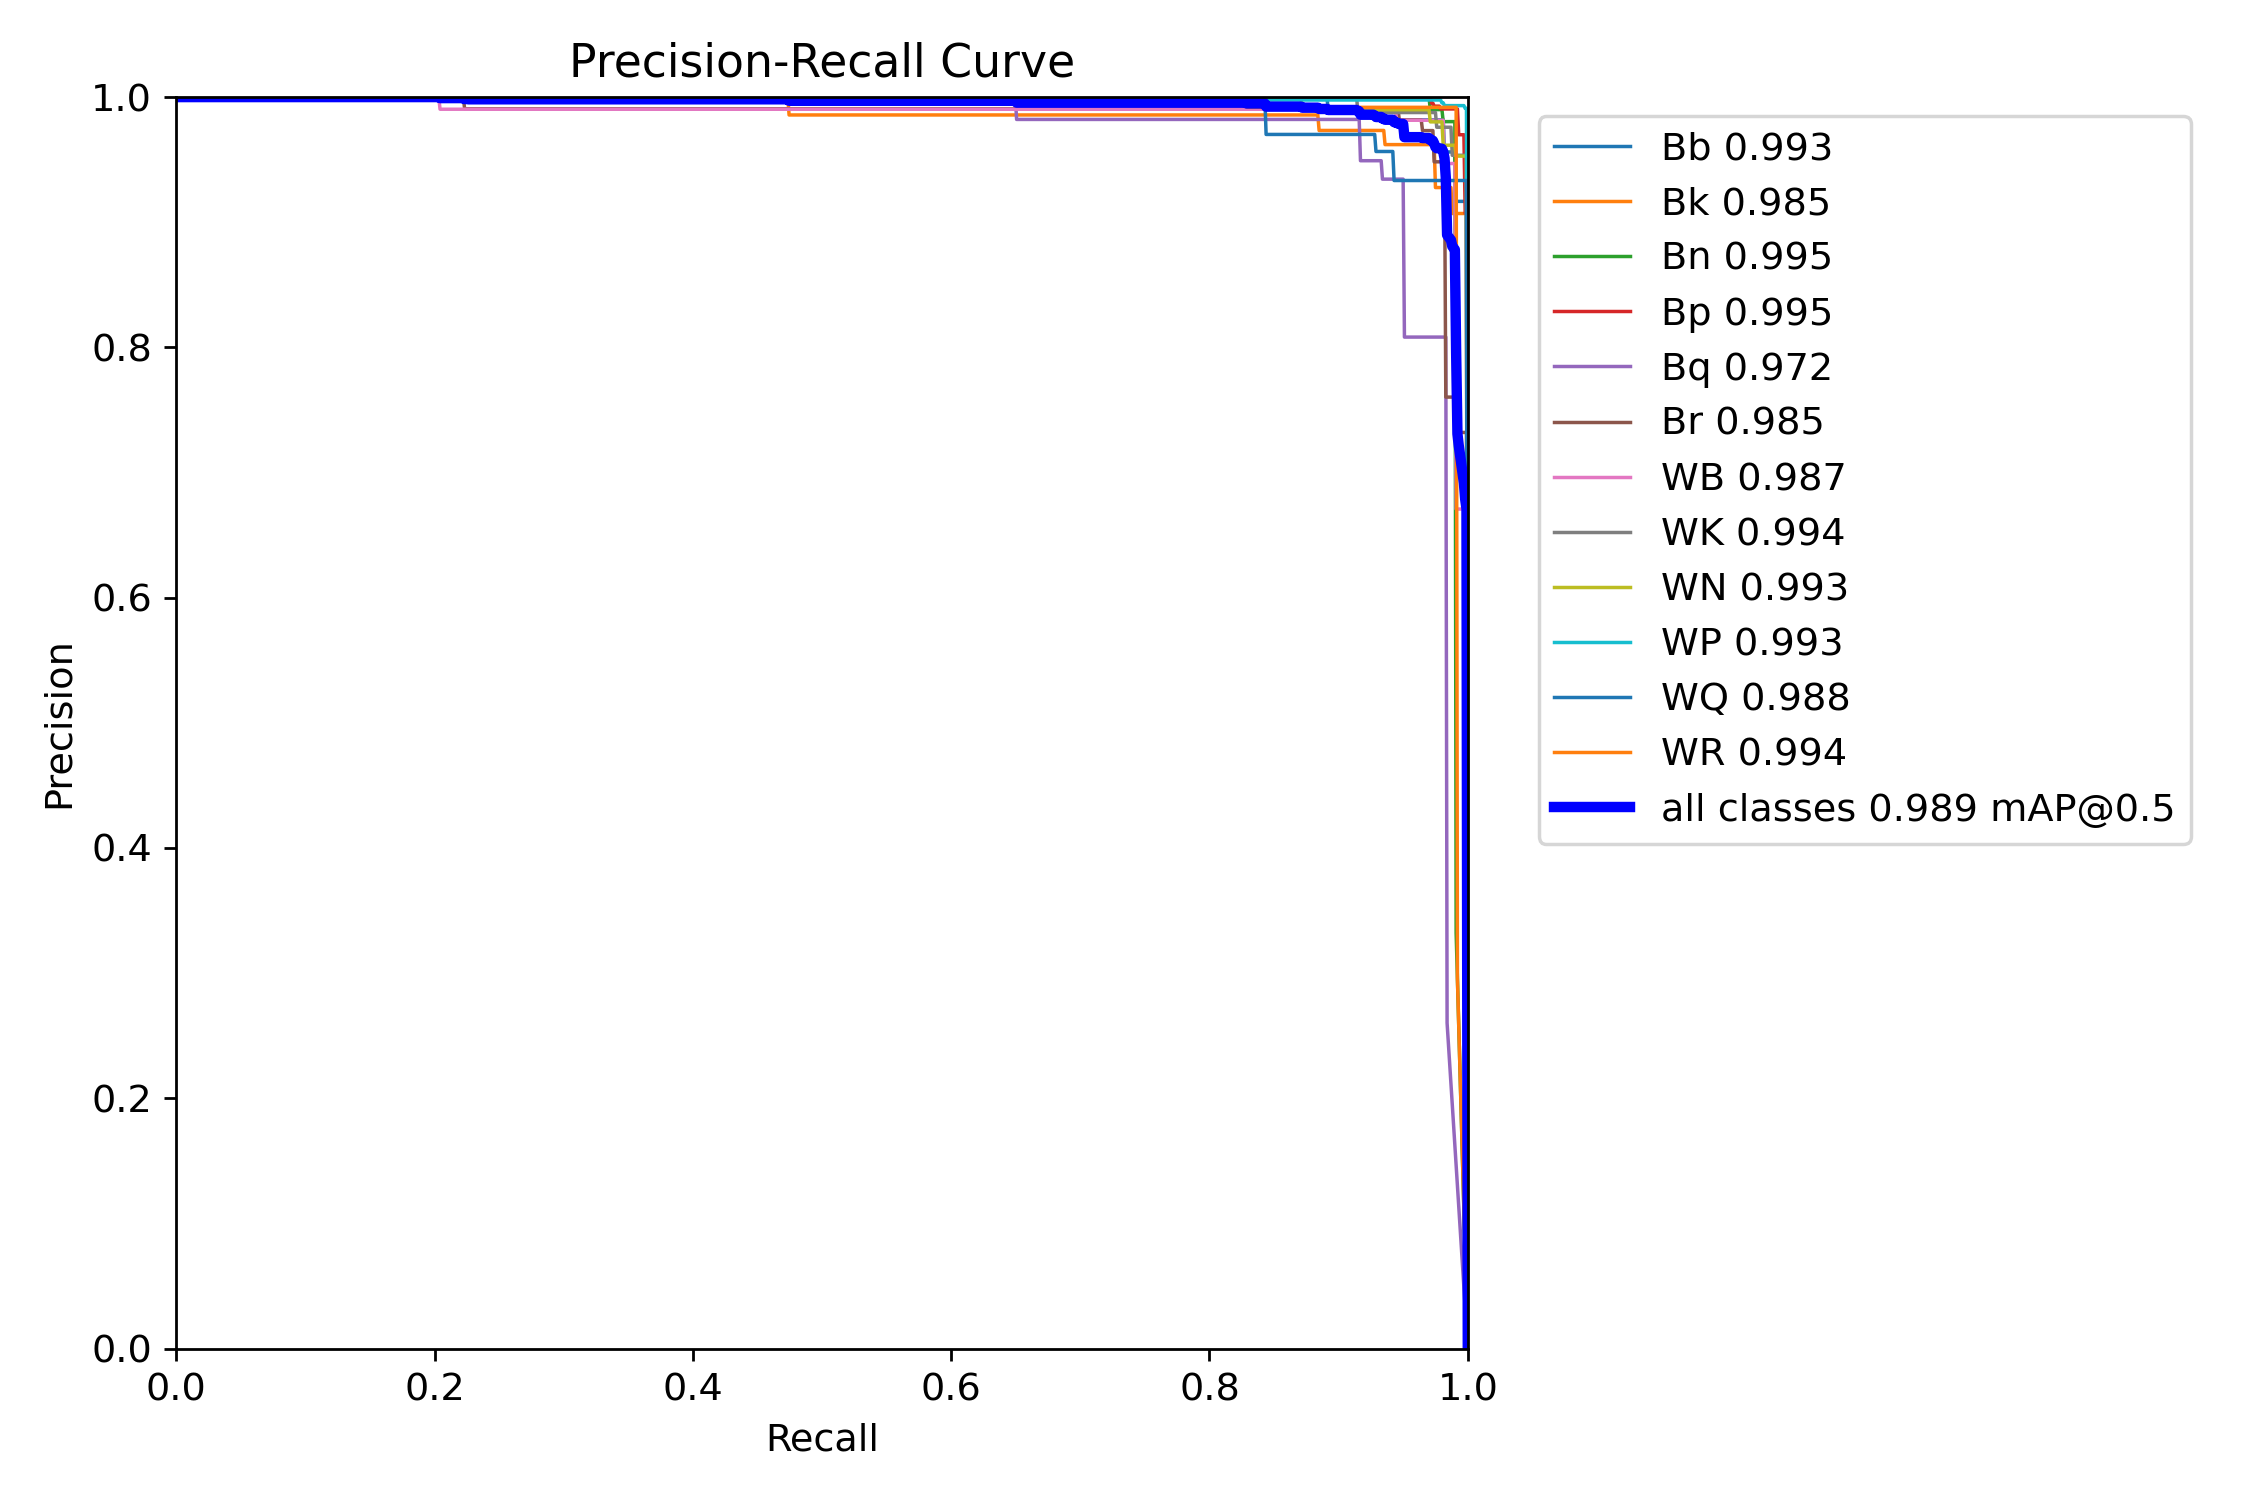

In [14]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

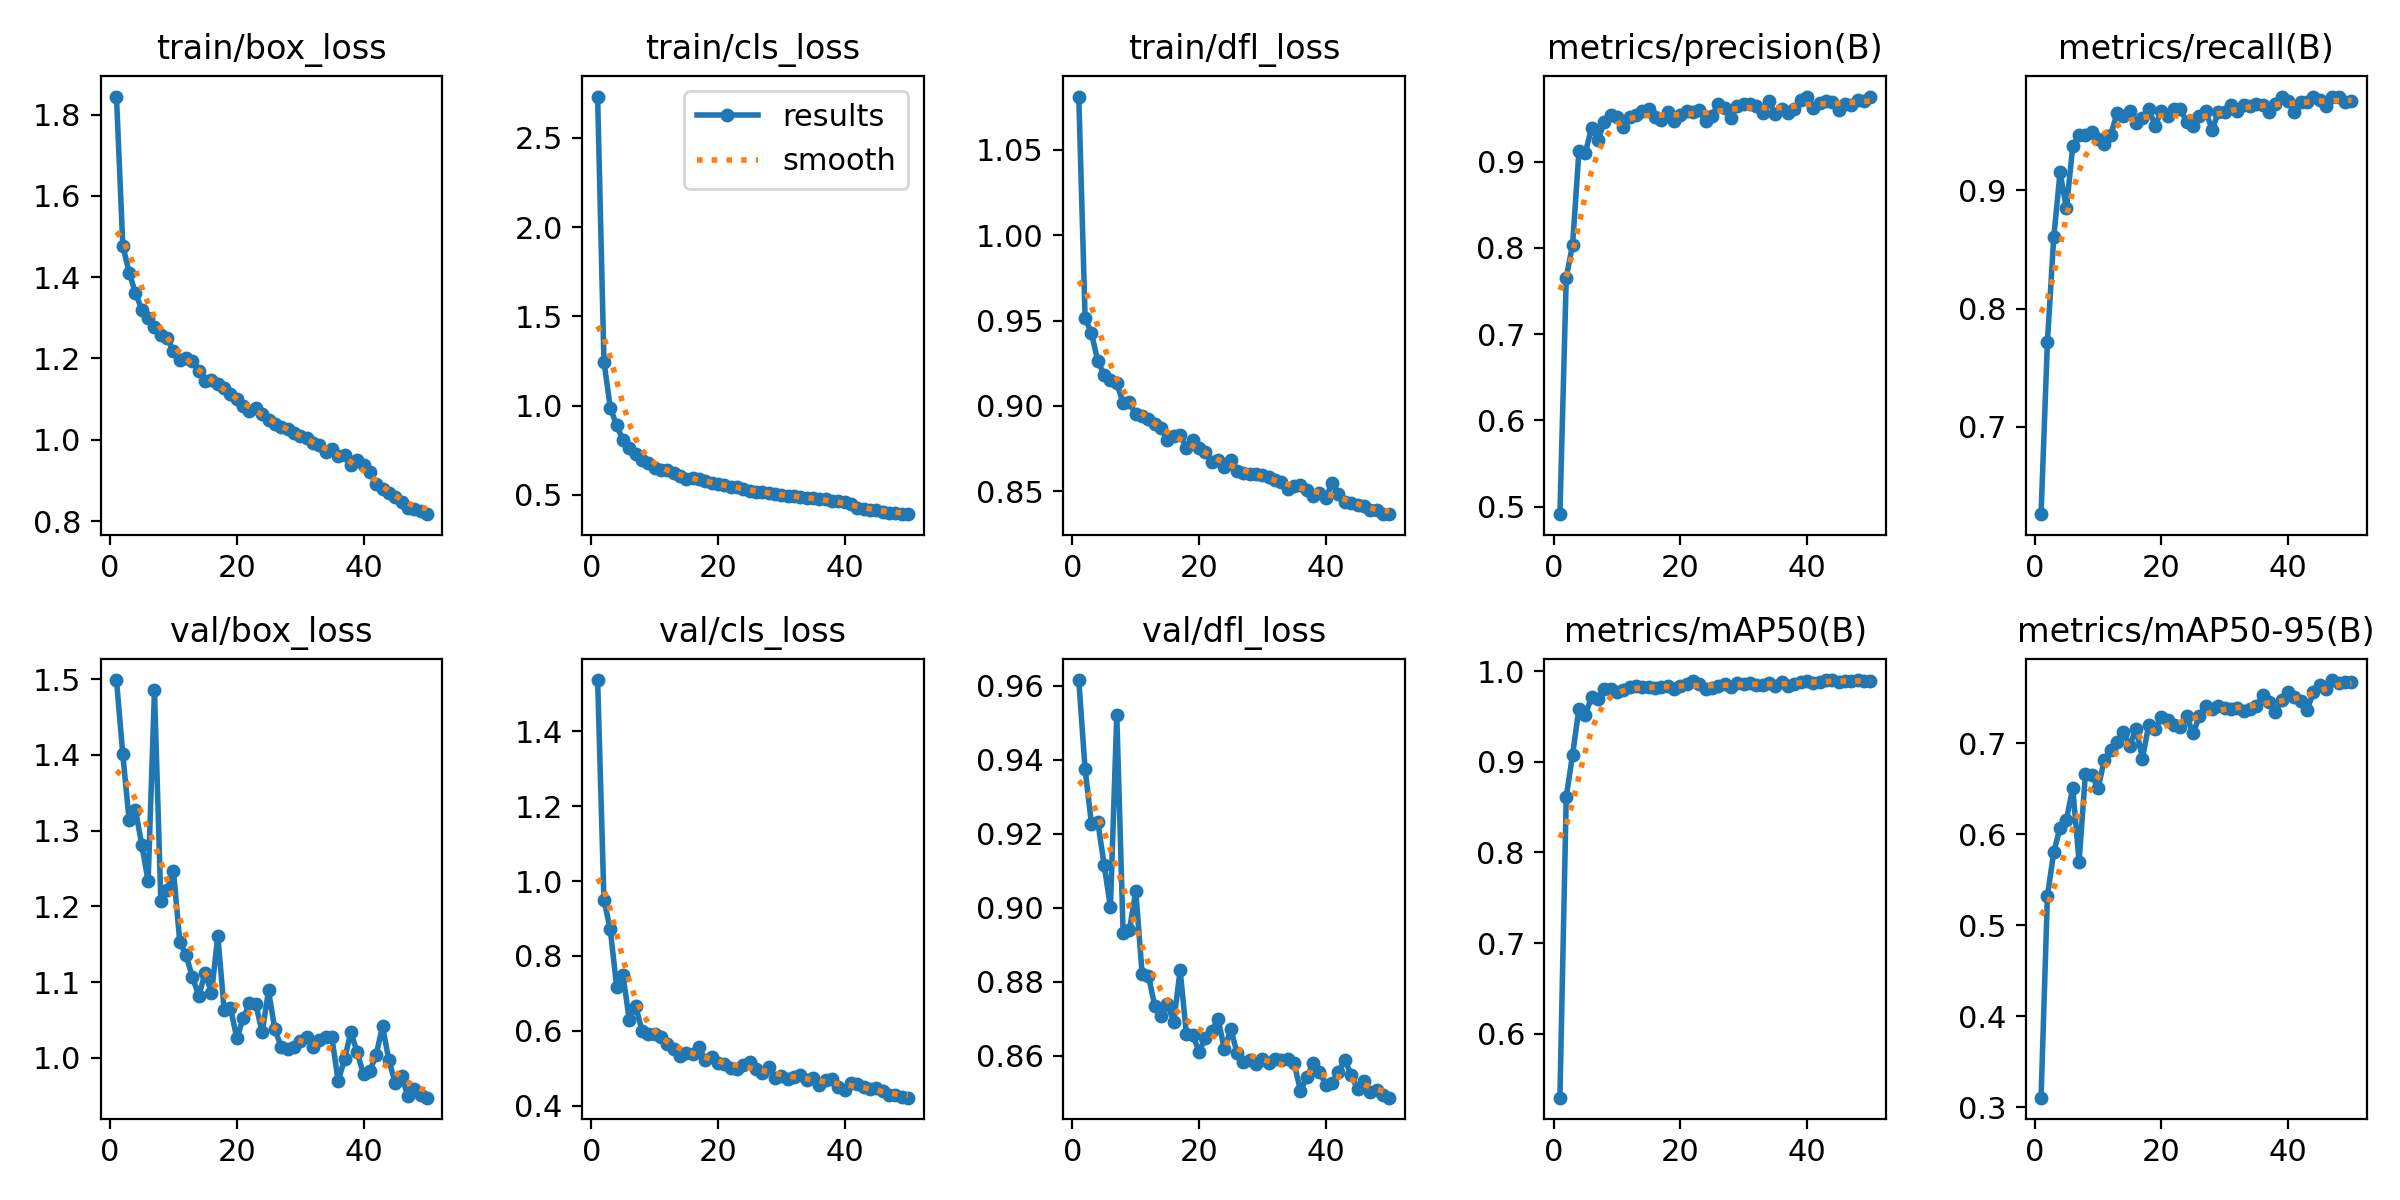

In [16]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

# Continuation of YOLOv3

Since training was canceled, this cannot be run.

## Use our model for inference

For predictions, we'll call a a Python script called `yolo_video.py` with required arguments for our use case: a path to our specific first stage trained weights (see our blog for why we're using only stage one), a path to our custom class names, and a flag to specify we're using images.

Additional arguments for `yolo_video.py` are as follows:

```
usage: yolo_video.py [-h] [--model MODEL] [--anchors ANCHORS]
                     [--classes CLASSES] [--gpu_num GPU_NUM] [--image]
                     [--input] [--output]

positional arguments:
  --input        Video input path
  --output       Video output path

optional arguments:
  -h, --help         show this help message and exit
  --model MODEL      path to model weight file, default model_data/yolo.h5
  --anchors ANCHORS  path to anchor definitions, default
                     model_data/yolo_anchors.txt
  --classes CLASSES  path to class definitions, default
                     model_data/coco_classes.txt
  --gpu_num GPU_NUM  Number of GPU to use, default 1
  --image            Image detection mode, will ignore all positional arguments
```

In [ ]:
!python yolo_video.py --model="./logs/000/trained_weights_stage_1.h5" --classes="_classes.txt" --image

For input image names into the above, consider trying the following:

- `00a7a49c47d51fd16a4cbb17e2d2cf86.jpg` # white-king works! + knight
- `015d0d7ff365f0b7492ff079c8c7d56c.jpg` # black-queen mixes up
- `176b28b5c417f39a9e5d37545fca5b4c.jpg` # finds only five
- `4673f994f60a2ea7afdddc1b752947c0.jpg` # white-rook (thinks king)
- `5ca7f0cb1c500554e65ad031190f8e9f.jpg` # white-pawn (missed white-king)
- `fbf15139f38a46e02b5f4061c0c9b08f.jpg` # black-king success!

You can view these images in your Colab notebook by clicking on the image name in the expanded left-hand panel (Files → keras-yolo3 → IMG_NAME ).

## Move currently trained model to GDrive

Optionally, you may want to save the new weights that your model trained so that the next time you run this notebook, you can either skip training and use these weights for inference or begin training where you left off with this weights file.

Following the below will link your Colab notebook to your Google Drive, and save the weights (named as the current time you saved them to enforce a unique file name) in your Drive folder.

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# create a copy of the weights file with a datetime
# and move that file to your own Drive
%cp ./logs/000/trained_weights_stage_1.h5 ./logs/000/trained_weights_stage_1_$(date +%F-%H:%M).h5
%mv ./logs/000/trained_weights_stage_1_$(date +%F-%H:%M).h5 /content/drive/My\ Drive/

# Conclusion


When we want to see how well a model finds and marks objects in pictures, we use different ways to check its performance. One way is called Mean Average Precision (mAP), which looks at how accurately the program finds objects and marks them in different categories. Additionally, Intersection over Union (IoU) compares how well the program's marks match the real outlines of objects. Also, Precision and Recall allows us understand how accurate and complete the detections are. Moreover, F1 Score combines precision and recall to give an overall grade for the program's performance. By using these measures, we can get a good sense of how well the program is doing its job of spotting and labeling objects in pictures.

YOLOv3, or You Only Look Once version 3 released in 2018, is a fast and accurate object detection algorithm. It quickly identifies and locates multiple objects in images or videos, making it ideal for real-time applications.  In the activity, various old version libraries were installed and imported. Dataset from Roboflow comprising of chess pieces images were loaded and prepared for training the model for the recognition of each pieces. However, error from dependencies occured due to unsupported versions of the packages. This made YOLOv3 difficult to train in Google Colab.

Different solutions and workarounds were done to solve the issue such as running the notebook locally, using upgraded packages, using different python version, and using different version of YOLO. Among those, using YOLOv8 was used for training the model since it is a more updated algorithm. Roboflow dataset also have a problem in loading its data in Colab for the version eight thus, a different dataset was used but it is still about recognizing chess pieces.